In [1]:
import numpy as np
import torch
import pandas as pd
# Imports
import torch.nn as nn
# Import nn.functional
import torch.nn.functional as F
import matplotlib
import matplotlib.pyplot as plt

In [10]:
## dataset -- you may replace this by measuring your own body temperature...

time = [0, 9, 24+15, 24+23, 48+9, 48+15, 48+23, 72+9, 72+17, 72+23, 96+9, 96+23, 120+8, 120+10, 120+17, 120+23, 144+8, 144+18, 168+9, 168+23, 192+8, 192+18, 192+23, 216+9, 216+14]
temp = [35.95, 36.50, 36.60, 36.17, 36.50, 37.09, 37.24, 36.53, 37.25, 36.79, 36.59, 
        36.62, 36.45, 36.8, 36.99, 36.19, 36.4, 37.01, 36.5, 35.7, 36.4, 36.98, 36.59, 36.65, 36.87]

Text(0, 0.5, 'body temperature')

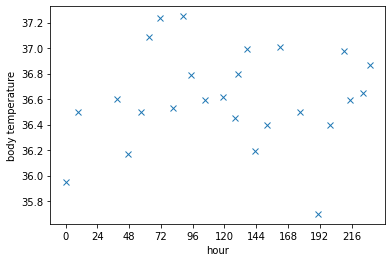

In [3]:
ind = np.arange(0,10) *24
plt.plot(time, temp, lw=0, marker='x')
plt.xticks(ind)
plt.xlabel('hour')
plt.ylabel('body temperature')

In [5]:
def xSin(x):
  a=20
  return x + torch.sin(a*x)*torch.sin(a*x)/a


def sincos(x):
  return torch.sin(x) + torch.cos(x)

class Net(nn.Module):
    # Initialize the layers
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1, 64)
        
        #self.linear1.weight = nn.Parameter(torch.zeros_like(self.linear1.weight).uniform_(-1, 1))
        #self.act1 = nn.Tanh() # Activation function
        #self.act1 = F.relu # Activation function
        #self.act1 = sincos
        self.act1 = xSin # Activation function
        self.linear2 = nn.Linear(64, 64)
        self.linear3 = nn.Linear(64, 1, bias=False)

    # Perform the computation
    def forward(self, x):
        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        x = self.act1(x)
        x = self.linear3(x)
        return x

0.13756994903087616


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Using a target size (torch.Size([25])) that is different to the input size (torch.Size([25, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


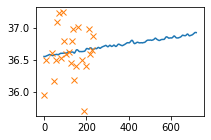

0.2715389132499695


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Using a target size (torch.Size([25])) that is different to the input size (torch.Size([25, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


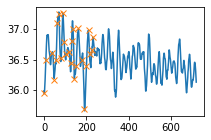

0.2722209095954895


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Using a target size (torch.Size([25])) that is different to the input size (torch.Size([25, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


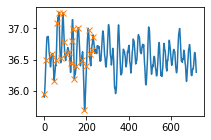

In [9]:
test_time = torch.arange(0, 720).float().unsqueeze(1) / 108 - 1.0

model = Net()
X = torch.Tensor(time).unsqueeze(1) / 108 - 1
Y = torch.Tensor(temp) - 36.6

opt = torch.optim.SGD(model.parameters(), 2e-2, momentum=0.9)
loss_fn = F.mse_loss
Epoch = 3000
losses = []

test_time = torch.arange(0, 720).float().unsqueeze(1) / 108 - 1.0
test_losses = []

zs = []
epsil = 0
#batchsize = 15
for i in range(Epoch):
  model.train()
  #upper = torch.randint(0, 24, (batchsize,1))
  #upper = torch.arange(0, 25)
  #print(upper)
  opt.zero_grad()
  y = model(X)
  #z = (model.linear1.weight.norm(2) ** 2) * epsil
  loss = loss_fn(y, Y.unsqueeze(1))
  (loss).backward()
  opt.step()
  losses.append(loss)
  
  #zs.append(z)
  if i == 1000:
      opt = torch.optim.SGD(model.parameters(), 2e-2/10, momentum=0.9)

  if i == 2000:
      opt = torch.optim.SGD(model.parameters(), 2e-2/50, momentum=0.9)
  if i % 1000 ==0:
    
    with torch.no_grad():
      model.eval()
      y = model(X)
      loss =  loss_fn(y, Y)
      print(loss.item())


      out = model(test_time).detach().numpy()
      plt.figure(figsize=(3, 2))
      plt.plot(((test_time +1.0)* 108)[:], out[:] + 36.6)
      plt.plot(time, temp, lw=0, marker='x')
      plt.show()
      plt.close()
    #test_losses.append(loss)